In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
train_data=pd.read_csv('Train.csv',sep=',')
test_data=pd.read_csv('Test.csv',sep=',')

In [3]:
train_data.head()

,Time,GHI,POA,A_Temp,M_Temp,Hmd,W_Speed,W_Dir,Rain,Grid_Voltage,InverterActivePower
0,2017-03-27 18:10:00,17.25,15.73,35.62,31.80,20.81,1.22,195.02,0.0,397.07,0.0
1,2017-03-27 19:37:00,0.00,0.00,32.51,27.37,25.46,2.12,44.94,0.0,398.65,0.0
2,2017-03-27 19:58:00,0.00,0.00,33.04,28.93,27.79,2.82,57.13,0.0,392.10,0.0
3,2017-03-27 21:57:00,0.00,0.00,30.67,27.15,33.08,2.18,51.21,0.0,387.84,0.0
4,2017-03-27 22:27:00,0.00,0.00,29.50,25.06,34.96,1.60,49.94,0.0,385.67,0.0


In [4]:
train_data.shape

(965566, 11)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965566 entries, 0 to 965565
Data columns (total 11 columns):
Time                   965566 non-null object
GHI                    936014 non-null float64
POA                    936032 non-null float64
A_Temp                 936033 non-null float64
M_Temp                 936000 non-null float64
Hmd                    936049 non-null float64
W_Speed                936030 non-null float64
W_Dir                  936020 non-null float64
Rain                   936066 non-null float64
Grid_Voltage           859096 non-null float64
InverterActivePower    859095 non-null float64
dtypes: float64(10), object(1)
memory usage: 81.0+ MB


In [6]:
train_data.isnull().sum()

Time                        0
GHI                     29552
POA                     29534
A_Temp                  29533
M_Temp                  29566
Hmd                     29517
W_Speed                 29536
W_Dir                   29546
Rain                    29500
Grid_Voltage           106470
InverterActivePower    106471
dtype: int64

In [7]:
train_data.corr()

,GHI,POA,A_Temp,M_Temp,Hmd,W_Speed,W_Dir,Rain,Grid_Voltage,InverterActivePower
GHI,1.000000,0.824544,0.518471,0.852123,-0.363917,0.331016,0.146083,-0.045701,-0.032346,0.816294
POA,0.824544,1.000000,0.506654,0.845127,-0.352496,0.362974,0.150377,-0.053346,-0.039769,0.829098
A_Temp,0.518471,0.506654,1.000000,0.798239,-0.614804,0.292048,0.285958,-0.049806,-0.076165,0.513892
M_Temp,0.852123,0.845127,0.798239,1.000000,-0.473704,0.385458,0.262869,-0.042024,-0.057516,0.859135
Hmd,-0.363917,-0.352496,-0.614804,-0.473704,1.000000,-0.209163,0.116956,0.189945,0.071849,-0.386794
W_Speed,0.331016,0.362974,0.292048,0.385458,-0.209163,1.000000,0.072688,-0.049864,-0.049602,0.364079
W_Dir,0.146083,0.150377,0.285958,0.262869,0.116956,0.072688,1.000000,0.062357,0.007261,0.110844
Rain,-0.045701,-0.053346,-0.049806,-0.042024,0.189945,-0.049864,0.062357,1.000000,0.022087,-0.059239
Grid_Voltage,-0.032346,-0.039769,-0.076165,-0.057516,0.071849,-0.049602,0.007261,0.022087,1.000000,-0.046511
InverterActivePower,0.816294,0.829098,0.513892,0.859135,-0.386794,0.364079,0.110844,-0.059239,-0.046511,1.000000


In [8]:
train_data.columns

Index(['Time', 'GHI', 'POA', 'A_Temp', 'M_Temp', 'Hmd', 'W_Speed', 'W_Dir',
       'Rain', 'Grid_Voltage', 'InverterActivePower'],
      dtype='object')

In [9]:
train_data['Time']

0         2017-03-27 18:10:00
1         2017-03-27 19:37:00
2         2017-03-27 19:58:00
3         2017-03-27 21:57:00
4         2017-03-27 22:27:00
5         2017-03-27 22:29:00
6         2017-03-27 22:40:00
7         2017-03-27 23:08:00
8         2017-03-27 23:52:00
9         2017-03-28 00:14:00
10        2017-03-28 00:37:00
11        2017-03-28 01:10:00
12        2017-03-28 01:14:00
13        2017-03-28 01:58:00
14        2017-03-28 02:03:00
15        2017-03-28 02:16:00
16        2017-03-28 02:19:00
17        2017-03-28 04:16:00
18        2017-03-28 04:19:00
19        2017-03-28 04:34:00
20        2017-03-28 04:36:00
21        2017-03-28 05:51:00
22        2017-03-28 06:01:00
23        2017-03-28 06:18:00
24        2017-03-28 07:07:00
25        2017-03-28 09:06:00
26        2017-03-28 09:37:00
27        2017-03-28 10:33:00
28        2017-03-28 11:01:00
29        2017-03-28 12:40:00
                 ...         
965536    2018-01-14 23:36:00
965537    2018-03-21 23:56:00
965538    

In [10]:
import calendar
from    datetime                 import   datetime
import datetime as dt

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965566 entries, 0 to 965565
Data columns (total 11 columns):
Time                   965566 non-null object
GHI                    936014 non-null float64
POA                    936032 non-null float64
A_Temp                 936033 non-null float64
M_Temp                 936000 non-null float64
Hmd                    936049 non-null float64
W_Speed                936030 non-null float64
W_Dir                  936020 non-null float64
Rain                   936066 non-null float64
Grid_Voltage           859096 non-null float64
InverterActivePower    859095 non-null float64
dtypes: float64(10), object(1)
memory usage: 81.0+ MB


In [12]:
train_data['Time']=train_data['Time'].apply(lambda x:dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
test_data['Time']=test_data['Time'].apply(lambda x:dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))


In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965566 entries, 0 to 965565
Data columns (total 11 columns):
Time                   965566 non-null datetime64[ns]
GHI                    936014 non-null float64
POA                    936032 non-null float64
A_Temp                 936033 non-null float64
M_Temp                 936000 non-null float64
Hmd                    936049 non-null float64
W_Speed                936030 non-null float64
W_Dir                  936020 non-null float64
Rain                   936066 non-null float64
Grid_Voltage           859096 non-null float64
InverterActivePower    859095 non-null float64
dtypes: datetime64[ns](1), float64(10)
memory usage: 81.0 MB


In [14]:
corr=train_data.corr()
corr

,GHI,POA,A_Temp,M_Temp,Hmd,W_Speed,W_Dir,Rain,Grid_Voltage,InverterActivePower
GHI,1.000000,0.824544,0.518471,0.852123,-0.363917,0.331016,0.146083,-0.045701,-0.032346,0.816294
POA,0.824544,1.000000,0.506654,0.845127,-0.352496,0.362974,0.150377,-0.053346,-0.039769,0.829098
A_Temp,0.518471,0.506654,1.000000,0.798239,-0.614804,0.292048,0.285958,-0.049806,-0.076165,0.513892
M_Temp,0.852123,0.845127,0.798239,1.000000,-0.473704,0.385458,0.262869,-0.042024,-0.057516,0.859135
Hmd,-0.363917,-0.352496,-0.614804,-0.473704,1.000000,-0.209163,0.116956,0.189945,0.071849,-0.386794
W_Speed,0.331016,0.362974,0.292048,0.385458,-0.209163,1.000000,0.072688,-0.049864,-0.049602,0.364079
W_Dir,0.146083,0.150377,0.285958,0.262869,0.116956,0.072688,1.000000,0.062357,0.007261,0.110844
Rain,-0.045701,-0.053346,-0.049806,-0.042024,0.189945,-0.049864,0.062357,1.000000,0.022087,-0.059239
Grid_Voltage,-0.032346,-0.039769,-0.076165,-0.057516,0.071849,-0.049602,0.007261,0.022087,1.000000,-0.046511
InverterActivePower,0.816294,0.829098,0.513892,0.859135,-0.386794,0.364079,0.110844,-0.059239,-0.046511,1.000000


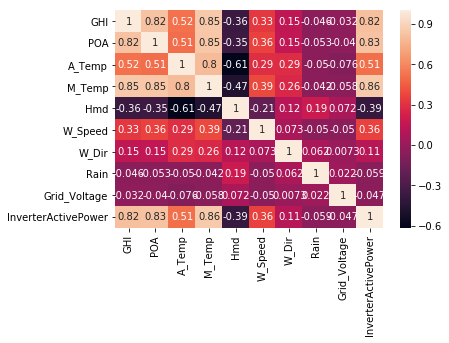

In [15]:
sns.heatmap(corr,annot=True)

plt.show()

In [16]:
#train_data.dropna(inplace=True)

In [17]:
train_data.shape

(965566, 11)

In [18]:
train_data.columns

Index(['Time', 'GHI', 'POA', 'A_Temp', 'M_Temp', 'Hmd', 'W_Speed', 'W_Dir',
       'Rain', 'Grid_Voltage', 'InverterActivePower'],
      dtype='object')

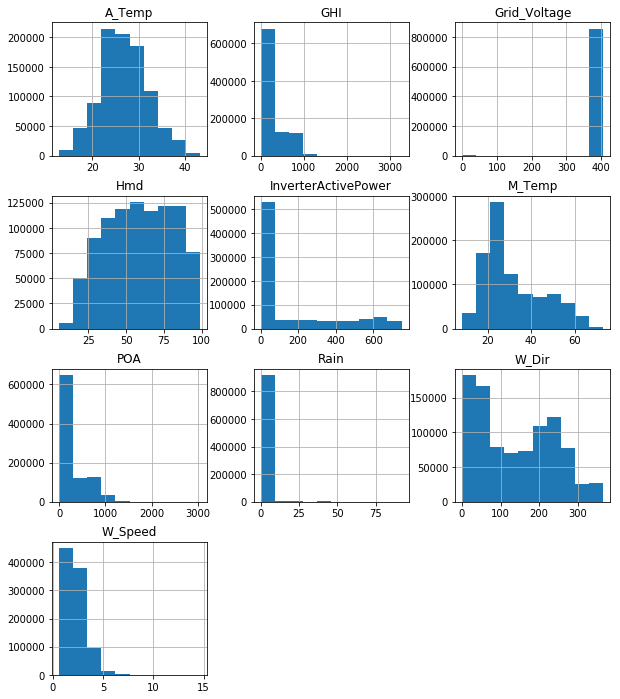

In [19]:
train_data.hist(figsize=(10,12))
plt.show()

In [20]:
train_data.head()

,Time,GHI,POA,A_Temp,M_Temp,Hmd,W_Speed,W_Dir,Rain,Grid_Voltage,InverterActivePower
0,2017-03-27 18:10:00,17.25,15.73,35.62,31.80,20.81,1.22,195.02,0.0,397.07,0.0
1,2017-03-27 19:37:00,0.00,0.00,32.51,27.37,25.46,2.12,44.94,0.0,398.65,0.0
2,2017-03-27 19:58:00,0.00,0.00,33.04,28.93,27.79,2.82,57.13,0.0,392.10,0.0
3,2017-03-27 21:57:00,0.00,0.00,30.67,27.15,33.08,2.18,51.21,0.0,387.84,0.0
4,2017-03-27 22:27:00,0.00,0.00,29.50,25.06,34.96,1.60,49.94,0.0,385.67,0.0


In [21]:
train_data.columns

Index(['Time', 'GHI', 'POA', 'A_Temp', 'M_Temp', 'Hmd', 'W_Speed', 'W_Dir',
       'Rain', 'Grid_Voltage', 'InverterActivePower'],
      dtype='object')

In [22]:
test_data.duplicated('Time')

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
241021    False
241022    False
241023    False
241024    False
241025    False
241026    False
241027    False
241028    False
241029    False
241030    False
241031    False
241032    False
241033    False
241034    False
241035    False
241036    False
241037    False
241038    False
241039    False
241040    False
241041    False
241042    False
241043    False
241044    False
241045    False
241046    False
241047    False
241048    False
241049    False
241050    False
Length: 241051, dtype: b

In [23]:
train_data[train_data['GHI']!=0].count()

Time                   482320
GHI                    452768
POA                    463037
A_Temp                 464010
M_Temp                 464044
Hmd                    463328
W_Speed                463025
W_Dir                  463123
Rain                   461771
Grid_Voltage           422700
InverterActivePower    422697
dtype: int64

In [24]:
train_data.drop_duplicates(subset=('Time','GHI', 'POA', 'A_Temp', 'M_Temp', 'Hmd', 'W_Speed', 'W_Dir',
       'Rain', 'Grid_Voltage', 'InverterActivePower'), keep='first', inplace=True)

In [25]:
train_data.duplicated().count()

876918

In [26]:
train_data.isnull().sum()

Time                        0
GHI                     27124
POA                     27132
A_Temp                  27118
M_Temp                  27164
Hmd                     27104
W_Speed                 27120
W_Dir                   27125
Rain                    27104
Grid_Voltage           101151
InverterActivePower    101153
dtype: int64

In [27]:
train_data.columns

Index(['Time', 'GHI', 'POA', 'A_Temp', 'M_Temp', 'Hmd', 'W_Speed', 'W_Dir',
       'Rain', 'Grid_Voltage', 'InverterActivePower'],
      dtype='object')

In [28]:
train_data.isnull().sum()

Time                        0
GHI                     27124
POA                     27132
A_Temp                  27118
M_Temp                  27164
Hmd                     27104
W_Speed                 27120
W_Dir                   27125
Rain                    27104
Grid_Voltage           101151
InverterActivePower    101153
dtype: int64

In [29]:
train_data[train_data['Time']>='2017-03-27 18:00:00']

,Time,GHI,POA,A_Temp,M_Temp,Hmd,W_Speed,W_Dir,Rain,Grid_Voltage,InverterActivePower
0,2017-03-27 18:10:00,17.25,15.73,35.62,31.80,20.81,1.22,195.02,0.0,397.07,0.00
1,2017-03-27 19:37:00,0.00,0.00,32.51,27.37,25.46,2.12,44.94,0.0,398.65,0.00
2,2017-03-27 19:58:00,0.00,0.00,33.04,28.93,27.79,2.82,57.13,0.0,392.10,0.00
3,2017-03-27 21:57:00,0.00,0.00,30.67,27.15,33.08,2.18,51.21,0.0,387.84,0.00
4,2017-03-27 22:27:00,0.00,0.00,29.50,25.06,34.96,1.60,49.94,0.0,385.67,0.00
5,2017-03-27 22:29:00,0.00,0.00,29.42,25.05,34.97,1.69,48.57,0.0,385.26,0.00
6,2017-03-27 22:40:00,0.00,0.00,28.91,24.68,36.91,0.80,340.43,0.0,387.46,0.00
7,2017-03-27 23:08:00,0.00,0.00,27.94,23.31,40.73,1.67,0.71,0.0,395.38,0.00
8,2017-03-27 23:52:00,0.00,0.00,26.99,22.91,43.43,1.20,226.68,0.0,397.16,0.00
9,2017-03-28 00:14:00,0.00,0.00,26.74,22.58,45.56,1.66,7.47,0.0,396.73,0.00


In [30]:
train_data[train_data['InverterActivePower']==0]

,Time,GHI,POA,A_Temp,M_Temp,Hmd,W_Speed,W_Dir,Rain,Grid_Voltage,InverterActivePower
0,2017-03-27 18:10:00,17.25,15.73,35.62,31.80,20.81,1.22,195.02,0.0,397.07,0.0
1,2017-03-27 19:37:00,0.00,0.00,32.51,27.37,25.46,2.12,44.94,0.0,398.65,0.0
2,2017-03-27 19:58:00,0.00,0.00,33.04,28.93,27.79,2.82,57.13,0.0,392.10,0.0
3,2017-03-27 21:57:00,0.00,0.00,30.67,27.15,33.08,2.18,51.21,0.0,387.84,0.0
4,2017-03-27 22:27:00,0.00,0.00,29.50,25.06,34.96,1.60,49.94,0.0,385.67,0.0
5,2017-03-27 22:29:00,0.00,0.00,29.42,25.05,34.97,1.69,48.57,0.0,385.26,0.0
6,2017-03-27 22:40:00,0.00,0.00,28.91,24.68,36.91,0.80,340.43,0.0,387.46,0.0
7,2017-03-27 23:08:00,0.00,0.00,27.94,23.31,40.73,1.67,0.71,0.0,395.38,0.0
8,2017-03-27 23:52:00,0.00,0.00,26.99,22.91,43.43,1.20,226.68,0.0,397.16,0.0
9,2017-03-28 00:14:00,0.00,0.00,26.74,22.58,45.56,1.66,7.47,0.0,396.73,0.0


In [31]:
copy=train_data.copy()

copy.replace(np.nan,'').groupby('Time',as_index=True).agg(''.join)

In [32]:
copy

,Time,GHI,POA,A_Temp,M_Temp,Hmd,W_Speed,W_Dir,Rain,Grid_Voltage,InverterActivePower
0,2017-03-27 18:10:00,17.25,15.73,35.62,31.80,20.81,1.22,195.02,0.0,397.07,0.00
1,2017-03-27 19:37:00,0.00,0.00,32.51,27.37,25.46,2.12,44.94,0.0,398.65,0.00
2,2017-03-27 19:58:00,0.00,0.00,33.04,28.93,27.79,2.82,57.13,0.0,392.10,0.00
3,2017-03-27 21:57:00,0.00,0.00,30.67,27.15,33.08,2.18,51.21,0.0,387.84,0.00
4,2017-03-27 22:27:00,0.00,0.00,29.50,25.06,34.96,1.60,49.94,0.0,385.67,0.00
5,2017-03-27 22:29:00,0.00,0.00,29.42,25.05,34.97,1.69,48.57,0.0,385.26,0.00
6,2017-03-27 22:40:00,0.00,0.00,28.91,24.68,36.91,0.80,340.43,0.0,387.46,0.00
7,2017-03-27 23:08:00,0.00,0.00,27.94,23.31,40.73,1.67,0.71,0.0,395.38,0.00
8,2017-03-27 23:52:00,0.00,0.00,26.99,22.91,43.43,1.20,226.68,0.0,397.16,0.00
9,2017-03-28 00:14:00,0.00,0.00,26.74,22.58,45.56,1.66,7.47,0.0,396.73,0.00


In [33]:
copy[copy['Time']=='2018-02-03 19:12:00']

,Time,GHI,POA,A_Temp,M_Temp,Hmd,W_Speed,W_Dir,Rain,Grid_Voltage,InverterActivePower
801,2018-02-03 19:12:00,NaN,0.0,25.54,19.67,23.91,2.05,44.6,0.0,390.55,0.0
802,2018-02-03 19:12:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,390.55,0.0


In [34]:
train_data.shape

(876918, 11)

In [35]:
train_data.dropna(subset=train_data.columns,inplace=True)

In [36]:
train_data.shape

(744608, 11)

In [54]:
train_data.isnull().sum()

GHI                    0
POA                    0
A_Temp                 0
M_Temp                 0
Hmd                    0
W_Speed                0
W_Dir                  0
Rain                   0
Grid_Voltage           0
InverterActivePower    0
dtype: int64

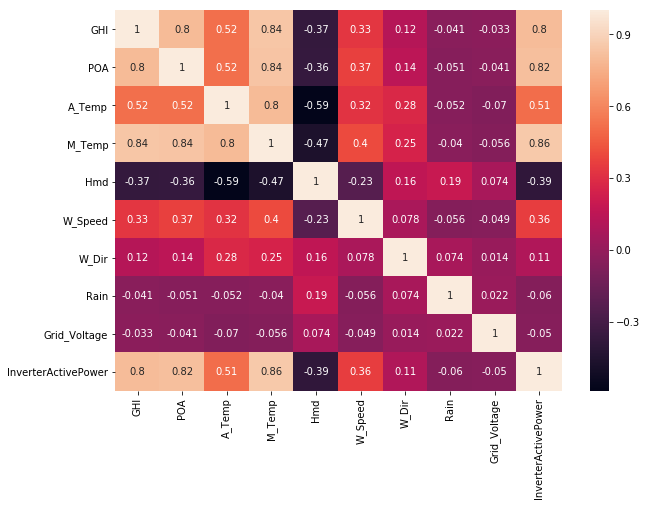

In [37]:
plt.figure(figsize=(10,7))
sns.heatmap(train_data.corr(),annot=True)

In [38]:
train_data.describe()

,GHI,POA,A_Temp,M_Temp,Hmd,W_Speed,W_Dir,Rain,Grid_Voltage,InverterActivePower
count,744608.000000,744608.000000,744608.000000,744608.000000,744608.000000,744608.000000,744608.000000,744608.000000,744608.000000,744608.000000
mean,211.204676,240.835203,26.724370,31.747443,61.478475,2.197732,140.999967,0.732839,386.647582,163.637037
std,312.586628,344.700588,4.777224,13.377554,21.302934,1.029317,96.332010,4.646690,26.853517,236.307912
min,0.000000,0.000000,13.000000,8.520000,10.620000,0.650000,0.570000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,23.660000,22.200000,44.610000,1.480000,49.220000,0.000000,384.180000,0.000000
50%,0.000000,5.220000,26.390000,26.480000,62.810000,2.090000,140.280000,0.000000,389.300000,0.000000
75%,385.510000,422.292500,30.130000,41.520000,79.820000,2.780000,226.880000,0.000000,392.500000,312.150000
max,3269.800000,3049.290000,42.250000,71.340000,98.900000,11.520000,365.220000,91.950000,406.040000,750.320000


In [39]:
from sklearn.preprocessing import StandardScaler


In [40]:
x=train_data.iloc[:,:10]
y=train_data.iloc[:,10]

In [41]:
x=x.set_index('Time')

In [42]:
train_data.Timestamp=pd.to_datetime(train_data.Time,format='%Y-%m-%d')


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [43]:
test_data.Timestamp=pd.to_datetime(test_data.Time,format='%Y-%m-%d')


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [44]:
train_data.index=train_data.Timestamp
test_data.index=test_data.Timestamp

In [45]:
train_data.drop('Time',axis=1,inplace=True)
test_data.drop('Time',axis=1,inplace=True)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
scaler = StandardScaler()

In [48]:
train_sc=scaler.fit_transform(x)
test=scaler.transform(test_data)


In [49]:
test_data.dropna(subset=test_data.columns,inplace=True)

In [50]:
xtrain,xtest,ytrain,ytest=train_test_split(train_sc,y,test_size=0.3,random_state=0)

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import auc,accuracy_score,confusion_matrix,mean_squared_error

In [52]:
lr=LinearRegression()
lr.fit(train_sc,y)
y_pred_train=lr.predict(train_sc)
y_pred_train

array([-28.36359139, -34.23013349, -18.49830522, ..., 334.91414113,
       300.79814691, 241.13677999])

In [53]:
y_pred_test=lr.predict(test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
y_pred_test

In [ ]:
lr.score(train_sc,y)*100

In [ ]:
rmse=mean_squared_error(y,y_pred_train)
rmse=np.sqrt(rmse)
rmse

In [ ]:
test_data['Time']=test_data.index

In [ ]:
test_data

In [ ]:
pred = pd.DataFrame({'Time' : test_data['Time'].tolist(), 'Predicted_Power': list(y_pred_test.tolist())}, columns=['Time', 'Predicted Power'])
pred.to_csv('C:/Users/naray/Desktop/prac/Data Science/Hackthon/pred.csv', encoding='utf-8', index=False)

In [ ]:
df_predict = pd.DataFrame({'Time' : test_data['Time'].tolist(), 'Predicted Power': list(y_pred_test.tolist())}, columns=['Time', 'Predicted Power'])
df_predict.to_csv('C:/Users/naray/Desktop/prac/Data Science/Hackthon/df_predict.csv', encoding='utf-8', index=False)

random

In [57]:
rf=RandomForestRegressor()
rf.fit(train_sc,y)
rf_pred=(train_sc)

rf_pred

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[-0.62048338, -0.65304604,  1.862093  , ...,  0.56076967,
        -0.15771208,  0.38812141],
       [-0.67566811, -0.69867988,  1.21108692, ..., -0.99717666,
        -0.15771208,  0.44695919],
       [-0.67566811, -0.69867988,  1.32203008, ..., -0.87063504,
        -0.15771208,  0.20304311],
       ...,
       [ 0.76694095,  0.64199179,  2.56124422, ...,  0.28806677,
        -0.15771208,  0.14234338],
       [ 0.62266085,  0.50427797,  2.57380382, ...,  1.25513953,
        -0.15771208,  0.17399662],
       [ 0.35243158,  0.24828752,  2.36657038, ...,  1.29074558,
        -0.15771208,  0.21644918]])

In [58]:
rf_rmse=mean_squared_error(y,rf_pred)
rf_rmse=np.sqrt(rf_rmse)

ValueError: y_true and y_pred have different number of output (1!=9)

In [ ]:
rf_rmse

KNN

In [ ]:
knn=KNeighborsRegressor()
knn.fit(train_sc,y)
knn_pred=(train_sc)
knn_rmse=mean_squared_error(y,knn_pred)
knn_rmse=np.sqrt(knn_rmse)


In [ ]:
knn_rmse